<a href="../02_LTF/_LTF-Index.ipynb">&larr; LTF-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/pyfda_icon2.svg' align='right' width='10%'></img>

# Zeitdiskrete Systeme im Frequenzbereich

In diesem Notebook sollen Sie eine interaktive Anwendung erstellen, die im Zeit- und Frequenzbereich die Wirkung eines Moving Average Filters demonstriert.

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

%matplotlib inline
import matplotlib.pyplot as plt
figsize = {"figsize":(13,5)}
from matplotlib import animation
import numpy as np
import scipy.signal as sig
import dsp_fpga_lib as dsp

## Zwei LTI-Systeme (nochmal)

Das folgende Bild zeigt nochmal ein einfaches Moving Average Filter.

![LTI-MA.png](../_img/LTI-MA.png)


### Definition des Filters über seine Koeffizienten
In der nächsten Codezelle definieren wir das Filter über seine Koeffizienten:

In [2]:
b = np.ones(4); a = 1 # MA-filter, N = 5

## Impulsantwort des Filters
Wenn das Filter ein IIR System ist (z.B. der Lossy Integrator), kann die Impulsantwort nicht mehr direkt aus den Koeffizienten abgelesen werden. Hier wird die Funktion `impz(b,a,N) ` aus der `dsp_fpga_lib` verwendet. `N` ist ein optionaler Parameter, der die Anzahl der darzustellenden Impulse angibt.

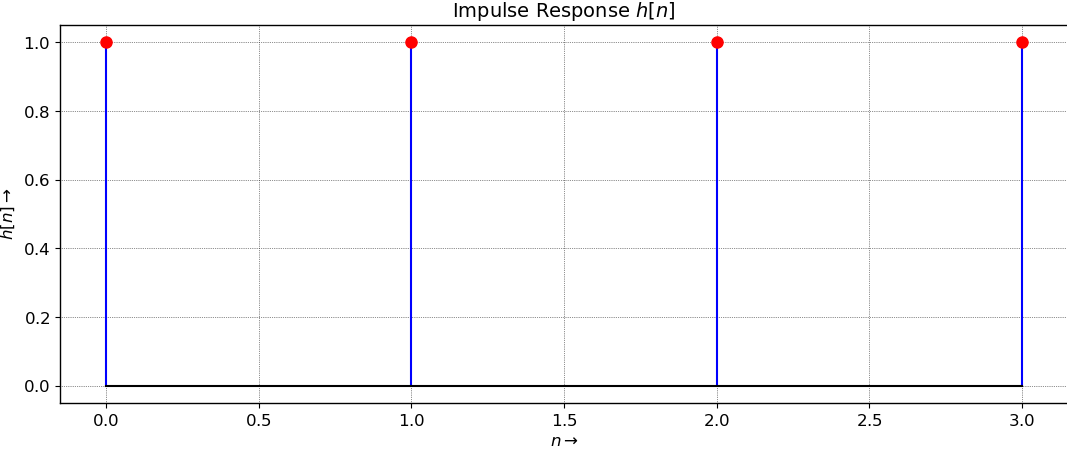

In [3]:
fig1, ax1 = plt.subplots(**figsize)
h = b # calculate impulse response from coefficients
n = np.arange(len(h))
ax1.stem(n, h, 'b-', 'ro', 'k', use_line_collection=True) # plot h[n]
ax1.set_xlabel(r'$n \rightarrow$'); plt.ylabel(r'$h[n] \rightarrow$');
ax1.set_title(r'Impulse Response $h[n]$');

## Zeitdiskrete und "analoge Signale"
Auch hier definieren wir ein sinusförmiges Testsignal $x[n]$ mit Gleichanteil.

In [4]:
Ts = 1/200.0     # sampling period
fsig = 50.0      # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = 6.0/fsig  # timespan for 6 signal periods 
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
t = np.arange(0,Tmax,tstep)  # time t
n = np.arange(0,round(N_Ts)) # sample n (start,stop,step)
xt = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*t + phi0) # x(t).
xn = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*n*Ts + phi0) # x[n]

## Gefiltertes Signal im Zeitbereich
Auch hier falten wir das Testsignal $x[n]$ mit der Impulsantwort des Filters $h[n]$, um das Ausgangssignal $y[n]$ zu erhalten:

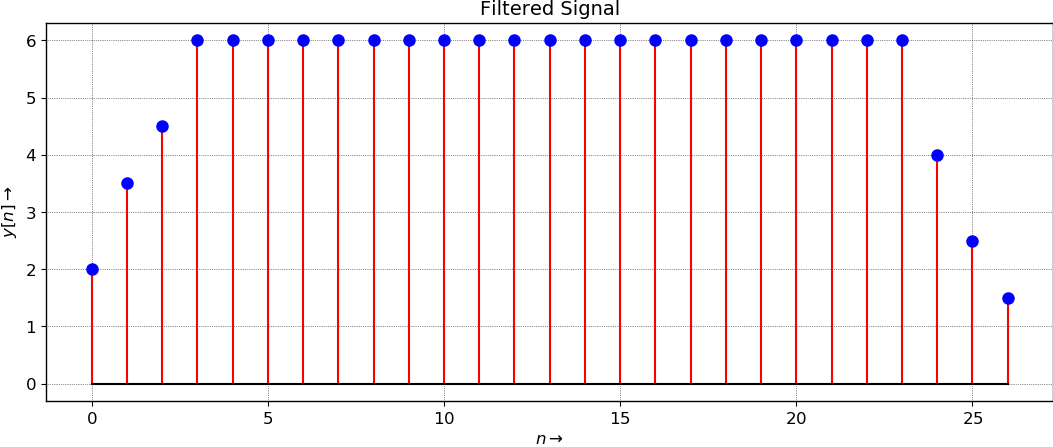

In [5]:
fig2, ax2 = plt.subplots(**figsize)
yn = np.convolve(xn,h) # convolve signal and response
ax2.stem(range(len(yn)), yn, 'r-', 'bo', 'k', use_line_collection=True) # y[n]
ax2.set_xlabel(r'$n \rightarrow$'); plt.ylabel(r'$y[n] \rightarrow$')
ax2.set_title('Filtered Signal');

## Pol- und Nullstellendiagramm
Zunächst stellen wir das Pol-/Nullstellendiagramm des Filter dar:

Nullstellen: [-1.00000000e+00+0.j -7.77156117e-16+1.j -7.77156117e-16-1.j]


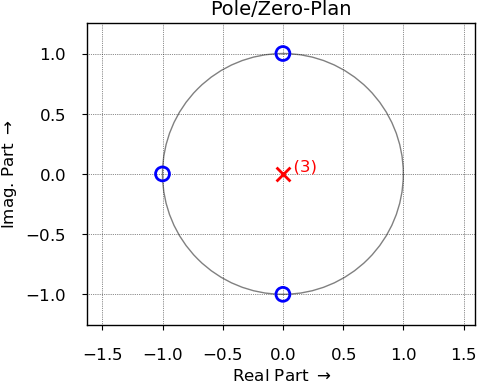

In [6]:
fig3, ax3 = plt.subplots(figsize=(5,4))
ax3.set_xlabel(r'Real Part $\rightarrow$'); ax3.set_ylabel(r'Imag. Part $\rightarrow$')
ax3.set_title('Pole/Zero-Plan')
dsp.zplane(b,a, plt_ax=ax3);
N = np.roots(b)
print("Nullstellen: {0}".format(N))

## Betragsfrequenzgang
Als nächstes schauen wir uns den Betragsfrequenzgang an:

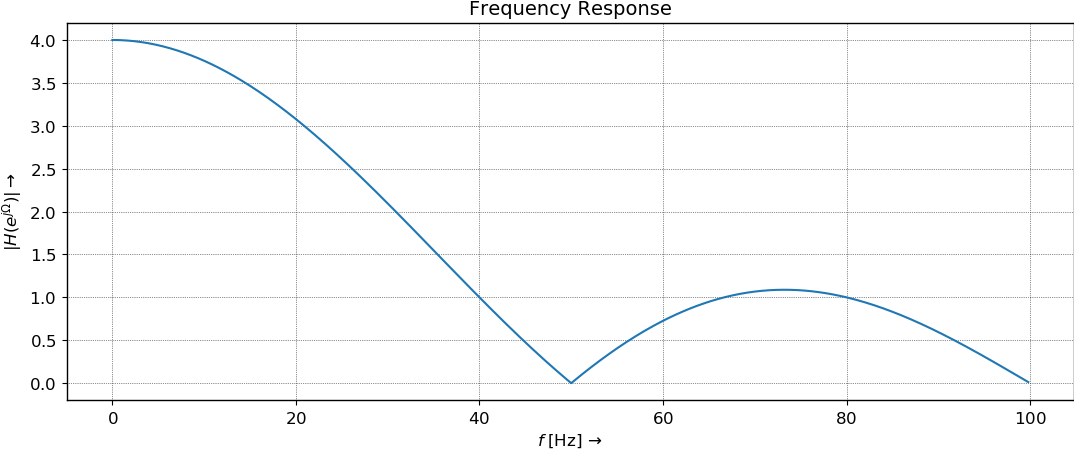

In [7]:
fig4, ax4 = plt.subplots(**figsize)
[W, H] = sig.freqz(b, a, whole=0);
f = W  / (Ts * 2 * np.pi)
ax4.plot(f,abs(H))
ax4.set_ylabel(r'$|H(e^{j \Omega})| \rightarrow$')
ax4.set_xlabel(r'$f \; \mathrm{ [Hz]} \, \rightarrow$')
ax4.set_title('Frequency Response');

### Aufgaben
- Erstellen Sie ein Notebook mit ähnlicher Funktionalität wie https://demonstrations.wolfram.com/MovingAverageDiscreteFilters/

***
### Copyright

(c) 2016 - 2020 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.